# Chapter 3 Interpretable Linear Transformations

We are now prepared to visualize the linear transformations we have seen in Section 3.8.2 in the lecture notes.

In [59]:
# numerical and scientific computing libraries  
import numpy as np 
import scipy as sp

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# for pretty printing
np.set_printoptions(4, linewidth=100, suppress=True)

### Rotation

The first example is rotations. 
Rotation on $\mathbb{R}^2$ by an angle of $\Theta$ can be represented by a matrix
\begin{align*}
A_\Theta = \begin{bmatrix}
\cos \Theta & -\sin \Theta \\ \sin \Theta & \cos \Theta
\end{bmatrix}.
\end{align*}

We generate a numbeer of random angles $\Theta$ from $[0,1.75\pi]$ and apply this rotation matrix $A_\Theta$ to $(1,1)^\top$, which results a cloud of points on a circle of radius $\sqrt{2}$.


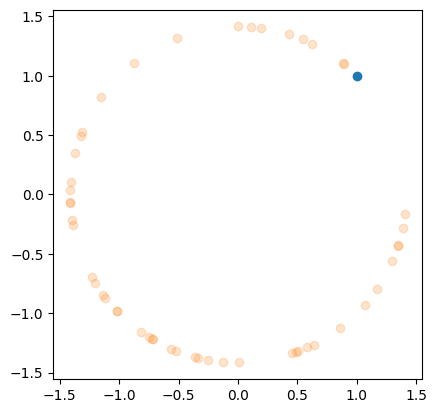

In [61]:
rng = np.random.RandomState(0)
n_points = 50

v = np.array([1, 1]) #/np.sqrt(2)

x = []
y = []

for i in range(n_points):
    random_angle = 1.75 * np.pi * rng.random()

    c = np.cos(random_angle)
    s = np.sin(random_angle)
    
    A = np.array([[c, -s], 
                  [s,c]])
    z = A@v
    x.append(z[0])
    y.append(z[1])

fig, ax = plt.subplots()
ax.scatter(v[0], v[1])
ax.scatter(x,y, alpha=0.2)
ax.set_aspect('equal')
plt.show()


### Projection

Projection in $\mathbb{R}^2$ onto a line passing through the origin and parallel to the vector $\mathbf{v} = (\cos \theta, \sin \theta)$ can be represented by the matrix

\begin{align*}
P_\theta = \begin{bmatrix}
\cos^2 \theta & \sin \theta \cos \theta \\ \sin \theta \cos \theta & \sin^2 \theta
\end{bmatrix}.
\end{align*}

The example below visualizes a projection onto a line in the direction of $\mathbf{v}$ with some $\theta$.

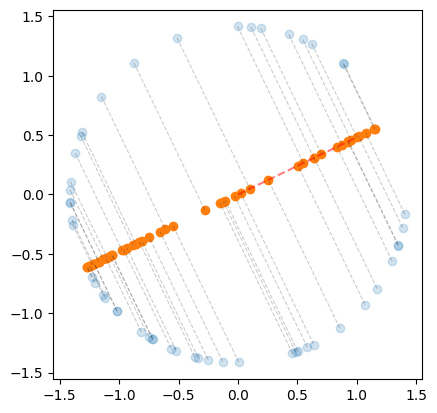

In [62]:
n_points = 50

proj_x = []
proj_y = []
theta = np.pi / 7

P_theta = np.array([[np.cos(theta) * np.cos(theta), np.sin(theta) * np.cos(theta)],
                    [np.sin(theta) * np.cos(theta), np.sin(theta) * np.sin(theta)]])

for i in range(n_points):
    v = np.array([x[i], y[i]])
    Pv = P_theta @ v
    proj_x.append(Pv[0])
    proj_y.append(Pv[1])

fig, ax = plt.subplots()
ax.plot([0, 1], [0, np.tan(theta)], '--', alpha=0.5, color='r')  # the line the points are projected to
ax.scatter(x, y, alpha=0.2)
ax.scatter(proj_x, proj_y)

for i in range(n_points):
    # let us connect the points to their projections: this will make the demonstration of the projection clearer
    ax.plot([x[i], proj_x[i]], [y[i], proj_y[i]], '--', alpha=0.2, color='k', linewidth=0.8)

ax.set_aspect('equal')
plt.show()

Observe that
\begin{align*}
P_\theta = \begin{bmatrix}
\cos^2 \theta & \sin \theta \cos \theta \\ \sin \theta \cos \theta & \sin^2 \theta
\end{bmatrix} = \begin{bmatrix}
\cos \theta \\ \sin \theta  
\end{bmatrix} \begin{bmatrix}
\cos \theta & \sin \theta
\end{bmatrix} = \mathbf{v}\mathbf{v}^\top.
\end{align*}

This expression of a projection generalizes to higher dimensions (and to general vector spaces, as we will see in Chapter 4). In $\mathbb{R}^n$, whenever $\mathbf{v}$ is a unit vector, the projection onto the line passing through the origin and parallel to the vector $\mathbf{v}$ can be represented by the matrix ${\mathbf{v}\mathbf{v}}^\top$.

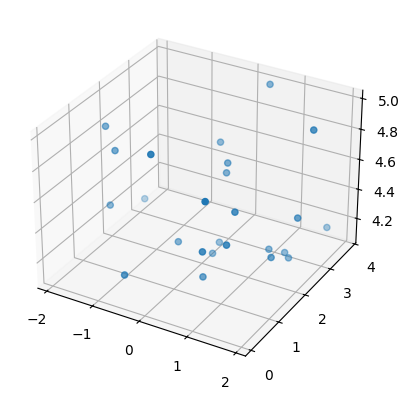

In [63]:
rng = np.random.RandomState(0)
n_points = 25

# generating some random points in R^3
x = -2.0 + 4.0 * rng.random(size=n_points)
y = 4.0 * rng.random(size=n_points)
z = 4.0 + rng.random(size=n_points)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
plt.show()

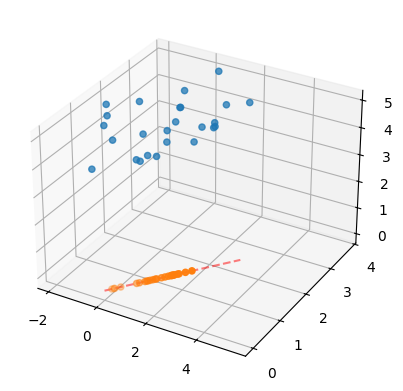

In [64]:
v = np.array([2, 0, 1])
v = v / np.linalg.norm(v)
v = v.reshape((-1, 1))  # convert to a "column vector", or more precisely, a 3*1 matrix

P = v @ v.T

proj_x = []
proj_y = []
proj_z = []

for i in range(n_points):
    proj_pt = P @ np.array([x[i], y[i], z[i]])
    proj_x.append(proj_pt[0])
    proj_y.append(proj_pt[1])
    proj_z.append(proj_pt[2])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0, 6*v[0, 0]], [0, 6*v[1, 0]], [0, 6*v[2, 0]], '--', alpha=0.5, color='r')  # the line the points are projected to
ax.scatter(x, y, z, alpha=0.75)
ax.scatter(proj_x, proj_y, proj_z)

plt.show()

### Reflection

As in the textbook, consider a reflection based on the projection matrix $P_\theta$ above. A reflection matrix can be defined as $H = I - 2P_\theta$. Let us visualize reflections of vectors in $\mathbf{R}^2$.

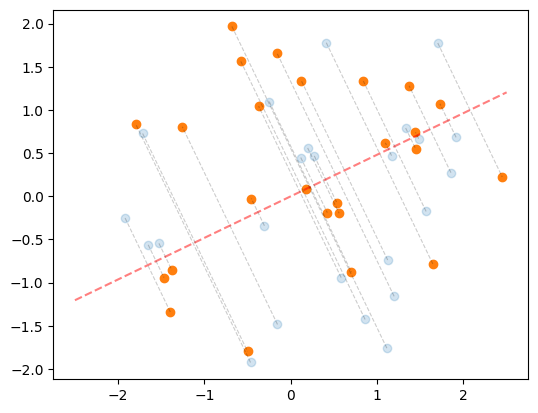

In [65]:
rng = np.random.RandomState(0)
n_points = 25

# generating some random points in R^2
x = -2.0 + 4.0 * rng.random(size=n_points)
y = -2.0 + 4.0 * rng.random(size=n_points)

# Define a reflection
H_theta = 2*P_theta - np.eye(2)

x_ref = []
y_ref = []

for i in range(n_points):
    pt_ref = H_theta @ np.array([x[i], y[i]])
    x_ref.append(pt_ref[0])
    y_ref.append(pt_ref[1])

fig, ax = plt.subplots()
ax.plot([-2.5, 2.5], [-2.5*np.tan(theta), 2.5*np.tan(theta)], '--', alpha=0.5, color='r')  # the line the points are projected to
ax.scatter(x, y, alpha=0.2)
ax.scatter(x_ref, y_ref)

for i in range(n_points):
    # let us connect the points to their projections: this will make the demonstration of the projection clearer
    ax.plot([x[i], x_ref[i]], [y[i], y_ref[i]], '--', alpha=0.2, color='k', linewidth=0.8)

ax.set_aspect('equal')
plt.show()  # this plot is actually much better when you run directly from python...